## 데이터 전처리

In [69]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [70]:
with open('/content/drive/MyDrive/ssafy/new_user_data.json') as f:
    js = json.loads(f.read()) ## json 라이브러리 이용

df = pd.DataFrame([item['fields'] for item in js])

In [71]:
df.head()

,username,financial_products,age,money,salary,password,nick_name,is_active,is_staff,is_superuser
0,user1,"35,1",38,44116309,3258925,1234,None,True,False,False
1,user2,"9,11,27",37,41097928,4843558,1234,None,True,False,False
2,user3,"33,34,31,13,2",26,23321862,2216592,1234,None,True,False,False
3,user4,"12,30",30,97110041,8436360,1234,None,True,False,False
4,user5,"13,1",35,21589165,3223742,1234,None,True,False,False


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   username            100 non-null    object
 1   financial_products  100 non-null    object
 2   age                 100 non-null    int64 
 3   money               100 non-null    int64 
 4   salary              100 non-null    int64 
 5   password            100 non-null    object
 6   nick_name           0 non-null      object
 7   is_active           100 non-null    bool  
 8   is_staff            100 non-null    bool  
 9   is_superuser        100 non-null    bool  
dtypes: bool(3), int64(3), object(4)
memory usage: 5.9+ KB


In [73]:
df.drop(['password',	'nick_name',	'is_active',	'is_staff',	'is_superuser'], inplace=True, axis=1)

In [74]:
df.head()

,username,financial_products,age,money,salary
0,user1,"35,1",38,44116309,3258925
1,user2,"9,11,27",37,41097928,4843558
2,user3,"33,34,31,13,2",26,23321862,2216592
3,user4,"12,30",30,97110041,8436360
4,user5,"13,1",35,21589165,3223742


In [75]:
df_rec = df.copy()

In [76]:
df_rec.drop(['username','financial_products','money'],inplace=True, axis=1)

In [77]:
scaler = MinMaxScaler()
df_rec.loc[:,:] = scaler.fit_transform(df_rec)

df_rec

,age,salary
0,0.339,0.098
1,0.321,0.246
2,0.125,0.000
3,0.196,0.582
4,0.286,0.094
...,...,...
95,0.964,0.735
96,0.161,0.019
97,0.929,0.581
98,0.143,0.119


## Model : K-means

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_rec)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [79]:
distance_df = pd.DataFrame(kmeans.transform(df_rec), columns=["c0", "c1", "c2"])
distance_df

,c0,c1,c2
0,0.775,0.137,0.648
1,0.679,0.124,0.506
2,0.991,0.197,0.803
3,0.637,0.412,0.291
4,0.812,0.099,0.662
...,...,...,...
95,0.146,0.931,0.522
96,0.952,0.164,0.772
97,0.163,0.816,0.511
98,0.896,0.096,0.688


In [80]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_rec.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,age,salary,cluster
0,0.821,0.705,Cluster 0
1,0.223,0.171,Cluster 1
2,0.442,0.738,Cluster 2


In [81]:
print(kmeans.inertia_)

3.6425356108388476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

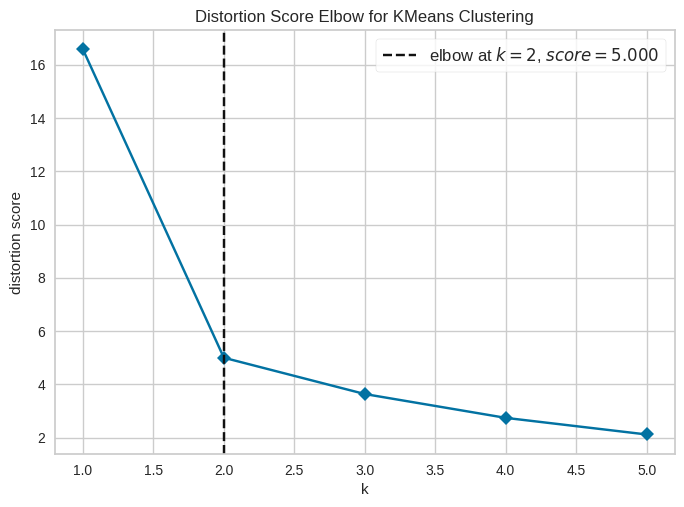

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=7)
visualizer = KElbowVisualizer(kmeans, k=(1,6), timings=False)
visualizer.fit(df_rec)
visualizer.show()

In [83]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(df_rec, kmeans.labels_)
print(silhouette_avg)

0.4055144065218


In [84]:
df_rec

,age,salary
0,0.339,0.098
1,0.321,0.246
2,0.125,0.000
3,0.196,0.582
4,0.286,0.094
...,...,...
95,0.964,0.735
96,0.161,0.019
97,0.929,0.581
98,0.143,0.119


In [85]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=7).fit(df_rec)
    silhouette_avg = silhouette_score(df_rec, kmeans.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')

cluster : 2 // silhouette index 0.6082832288870617
cluster : 3 // silhouette index 0.5126739845762814
cluster : 4 // silhouette index 0.38611920173724307
cluster : 5 // silhouette index 0.4055144065218


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, The average silhouette_score is : 0.6082832288870617
For n_clusters = 3, The average silhouette_score is : 0.5126739845762813
For n_clusters = 4, The average silhouette_score is : 0.386119201737243


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, The average silhouette_score is : 0.4017067731979313
For n_clusters = 6, The average silhouette_score is : 0.42432096538669906


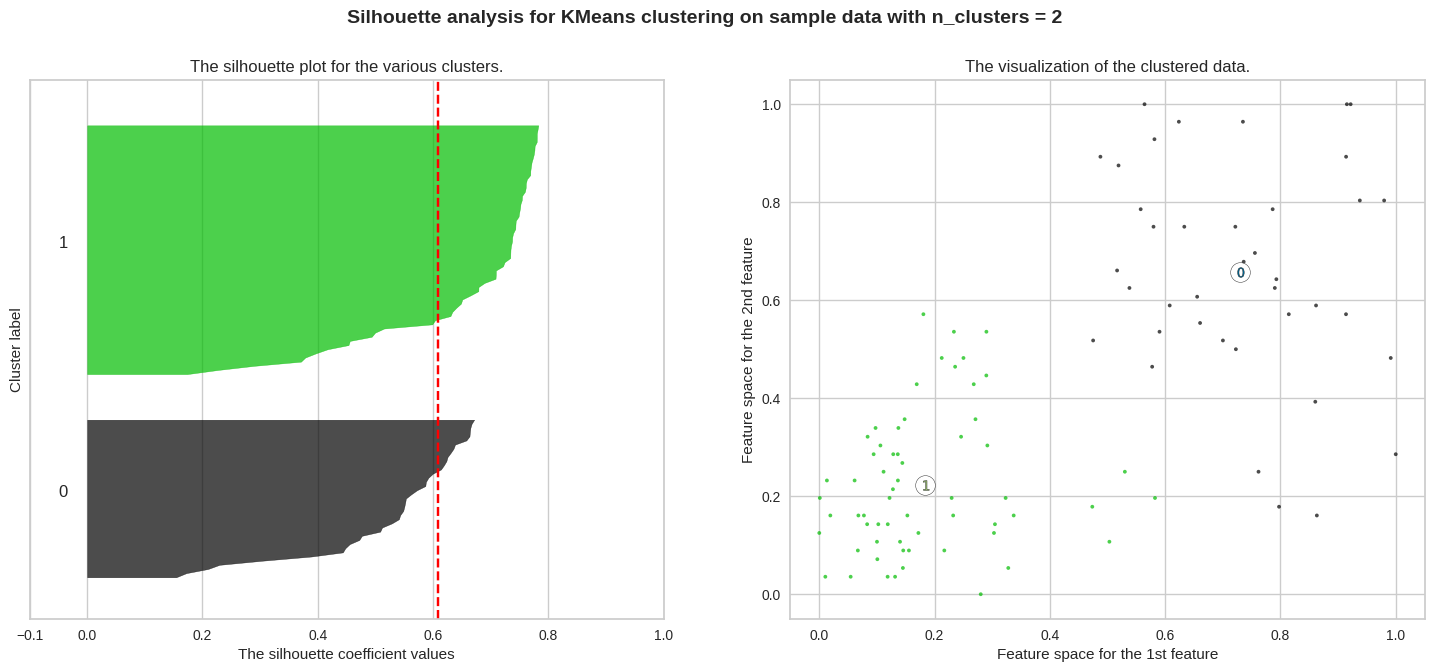

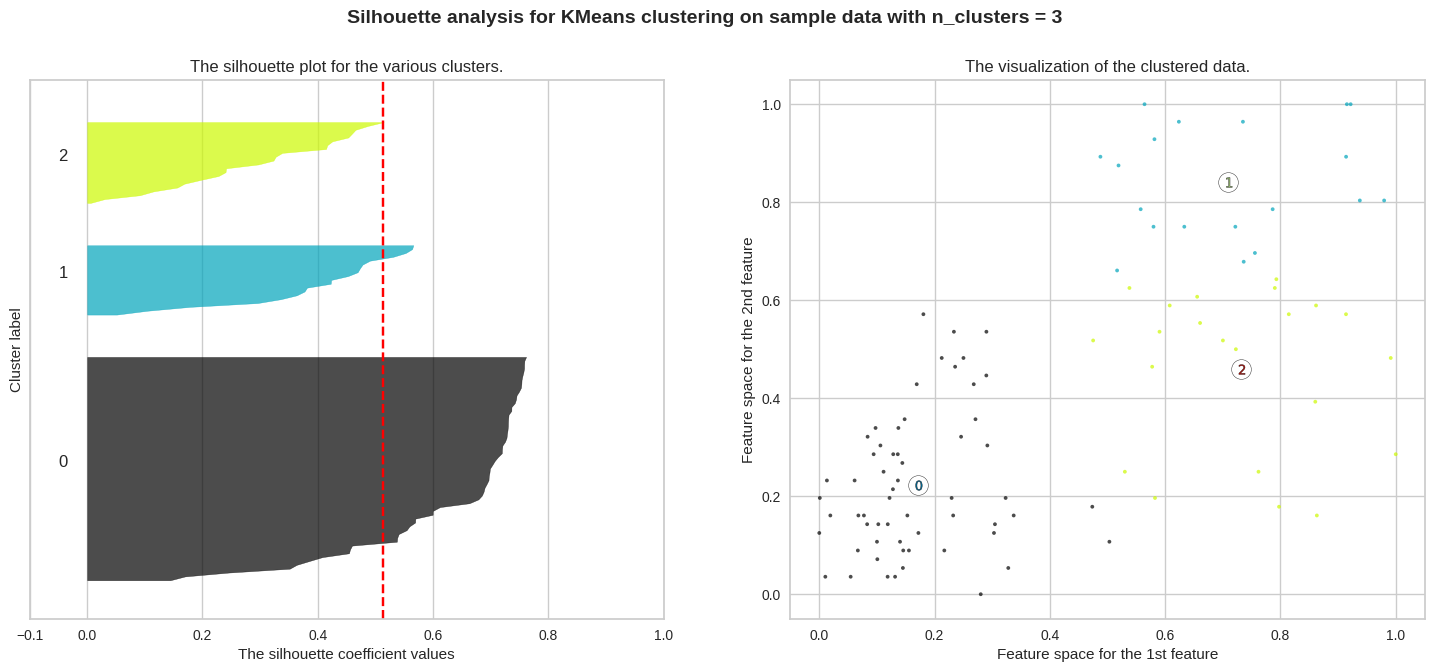

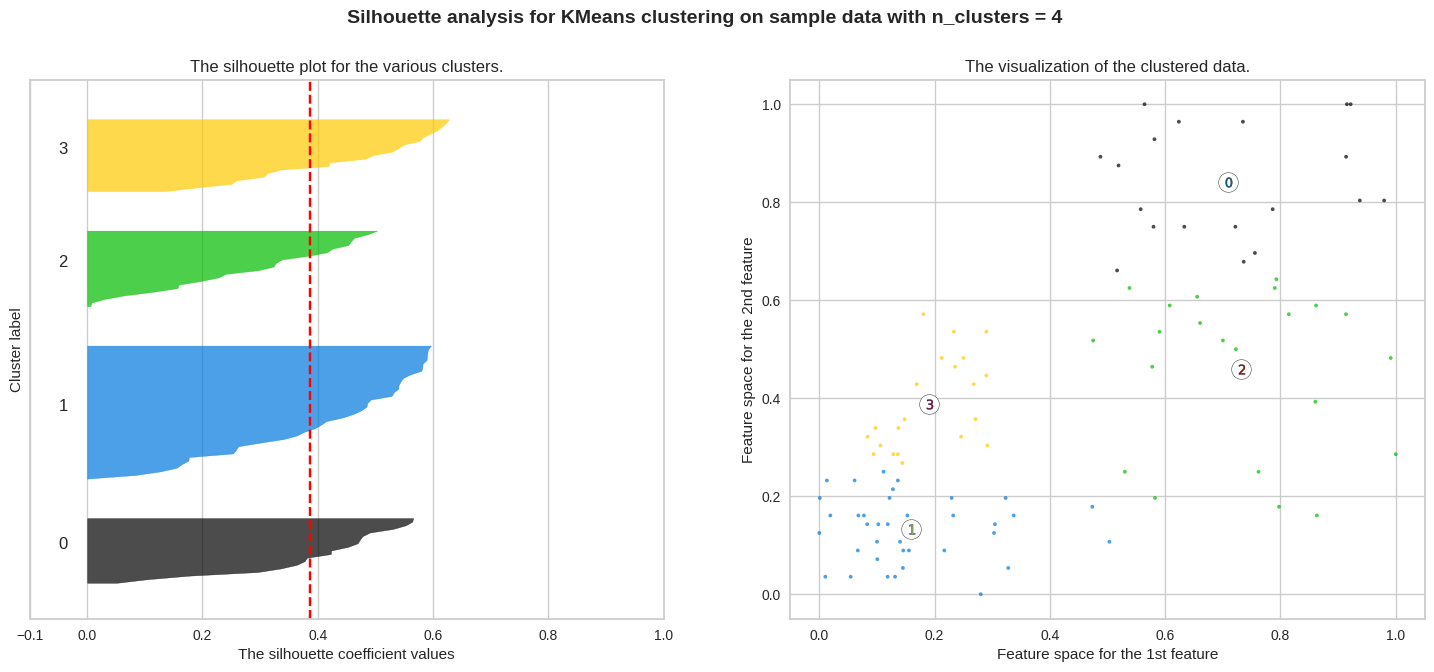

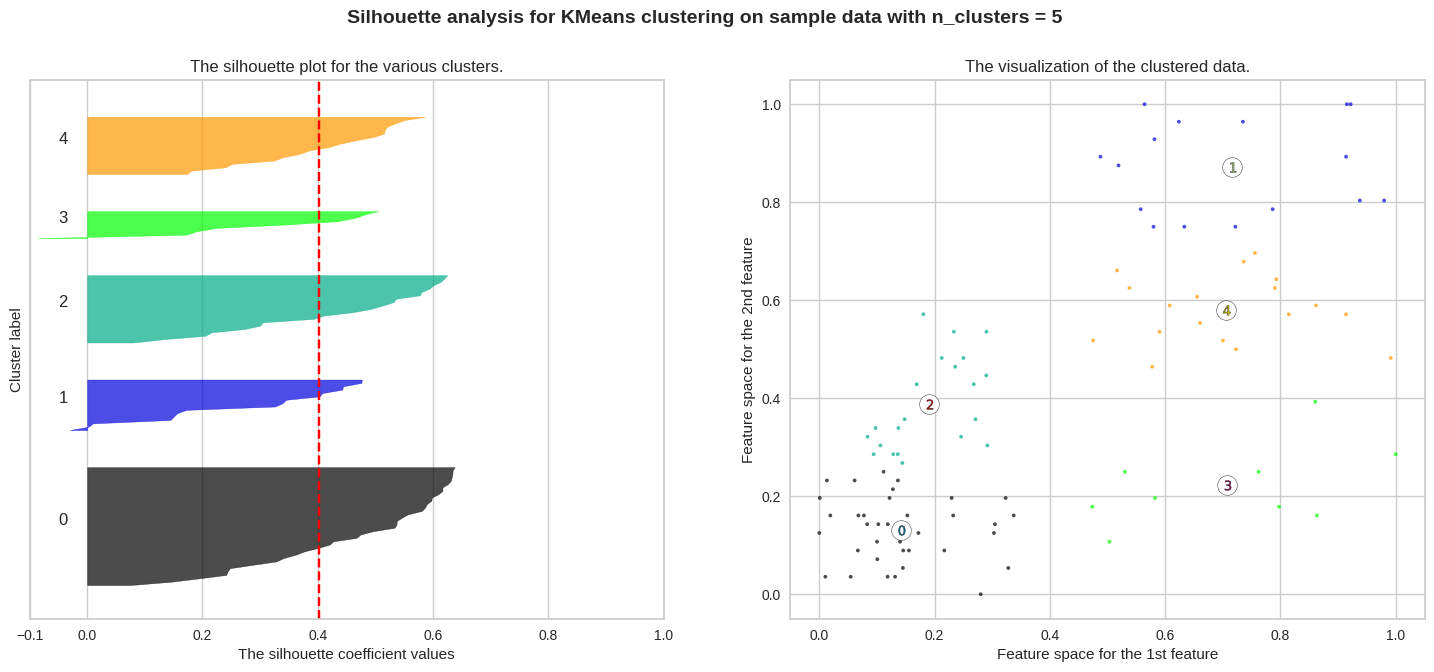

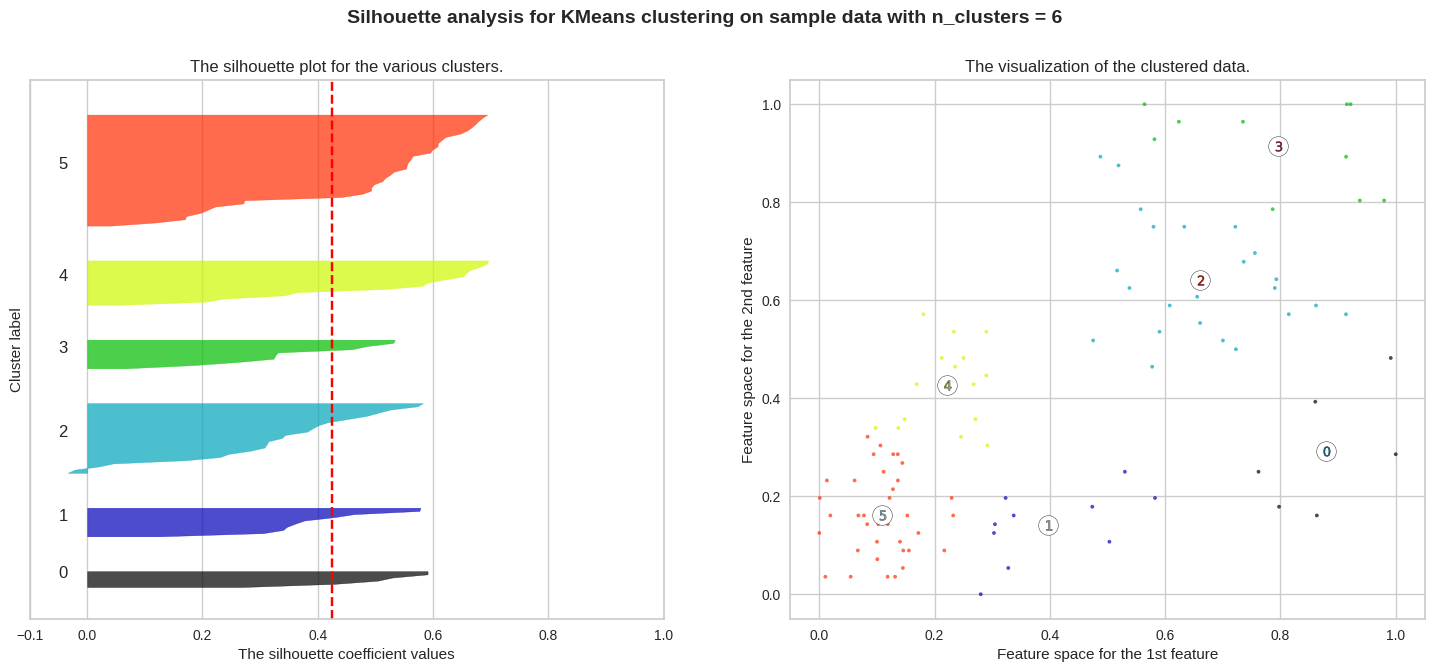

In [86]:
import json
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

# JSON 파일 경로
file_path = '/content/drive/MyDrive/ssafy/new_user_data.json'

# JSON 파일 불러오기
with open(file_path, 'r') as file:
    data = json.load(file)

# fields 키의 값들을 추출하여 DataFrame 생성
df = pd.DataFrame([item['fields'] for item in data])

# 필요한 컬럼만 선택하여 클러스터링에 사용할 데이터 준비
X = df[['salary', 'age']].values

# Min-Max Scaling 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')

plt.show()


In [87]:
def generate_user_data(pk, username, products):
    if any(product in high_net_worth_products for product in products):
        age = generate_value(50, 0.5)  # Base 50, 50% variation
        money = generate_value(10000000 * 12, 0.5)  # Base 120,000,000, 50% variation
        salary = generate_value(10000000, 0.3)  # Base 10,000,000, 30% variation
    elif any(product in mid_net_worth_products for product in products):
        age = generate_value(35, 0.5)  # Base 35, 50% variation
        money = generate_value(4500000 * 12, 0.5)  # Base 54,000,000, 50% variation
        salary = generate_value(4500000, 0.3)  # Base 4,500,000, 30% variation
    else:
        age = generate_value(30, 0.3)  # Base 30, 30% variation
        money = generate_value(3000000 * 12, 0.5)  # Base 36,000,000, 50% variation
        salary = generate_value(3000000, 0.3)  # Base 3,000,000, 30% variation

In [88]:
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# JSON 파일 경로
file_path = '/content/drive/MyDrive/ssafy/new_user_data.json'

# JSON 파일 불러오기
with open(file_path, 'r') as file:
    data = json.load(file)

# fields 키의 값들을 추출하여 DataFrame 생성
df = pd.DataFrame([item['fields'] for item in data])

# 숫자가 지수 표기법으로 표시되지 않도록 설정
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 클러스터링에 사용할 데이터 준비
X = df[['salary', 'age']].values

# Min-Max Scaling 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터링 결과를 저장할 리스트 초기화
clustering_results = []

for n_clusters in range(2, 7):
    # KMeans 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # 각 클러스터의 특징을 담은 데이터프레임 생성
    cluster_data = df.copy()
    cluster_data['cluster'] = cluster_labels

    # 각 클러스터 별 평균 salary, money, age 계산
    cluster_means = cluster_data.groupby('cluster').agg({
        'salary': 'mean',
        'money': 'mean',
        'age': 'mean'
    }).reset_index()

    # 각 클러스터 별로 financial_products를 선택한 횟수 계산
    cluster_summary = cluster_data.groupby('cluster')['financial_products'].apply(lambda x: ','.join(x)).reset_index()
    cluster_summary['financial_products'] = cluster_summary['financial_products'].apply(lambda x: pd.Series(x.split(',')).value_counts().to_dict())

    # 클러스터 평균과 financial_products 요약 병합
    summary = pd.merge(cluster_means, cluster_summary, on='cluster')

    # 클러스터링 결과 저장
    clustering_results.append((n_clusters, summary))

# 결과 출력
for n_clusters, summary in clustering_results:
    print(f"\nClustering with {n_clusters} clusters:")
    display(summary)



Clustering with 2 clusters:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,cluster,salary,money,age,financial_products
0,0,10005293.256,117540600.462,55.821,"{'18': 18, '14': 15, '19': 14, '22': 14, '15':..."
1,1,4176178.033,52192748.623,31.508,"{'33': 18, '35': 15, '34': 15, '31': 14, '1': ..."



Clustering with 3 clusters:


,cluster,salary,money,age,financial_products
0,0,4041229.492,50521562.559,31.508,"{'33': 18, '35': 15, '34': 15, '1': 14, '31': ..."
1,1,9786377.316,112122697.316,66.105,"{'18': 9, '22': 9, '19': 8, '24': 7, '16': 6, ..."
2,2,10026344.909,120760802.000,44.727,"{'14': 10, '18': 9, '15': 8, '12': 7, '30': 7,..."



Clustering with 4 clusters:


,cluster,salary,money,age,financial_products
0,0,9786377.316,112122697.316,66.105,"{'18': 9, '22': 9, '19': 8, '24': 7, '16': 6, ..."
1,1,3921718.342,52712693.895,26.421,"{'33': 14, '31': 11, '2': 11, '34': 11, '35': ..."
2,2,10026344.909,120760802.000,44.727,"{'14': 10, '18': 9, '15': 8, '12': 7, '30': 7,..."
3,3,4257487.762,46556658.238,40.714,"{'9': 6, '1': 5, '8': 5, '35': 4, '11': 4, '27..."



Clustering with 5 clusters:


,cluster,salary,money,age,financial_products
0,0,3726643.917,45963666.472,26.389,"{'33': 14, '34': 11, '31': 11, '2': 11, '35': ..."
1,1,9864992.688,112078062.562,67.812,"{'18': 8, '22': 7, '19': 7, '24': 6, '20': 5, ..."
2,2,4257487.762,46556658.238,40.714,"{'9': 6, '1': 5, '8': 5, '35': 4, '11': 4, '27..."
3,3,9778506.111,128951286.222,31.444,"{'18': 5, '12': 3, '30': 3, '16': 3, '14': 3, ..."
4,4,9752246.389,121202705.056,51.444,"{'15': 9, '14': 9, '22': 7, '16': 7, '36': 6, ..."



Clustering with 6 clusters:


,cluster,salary,money,age,financial_products
0,0,11605025.667,130211004.833,35.333,"{'18': 4, '14': 3, '30': 3, '19': 2, '12': 2, ..."
1,1,6451763.100,89906607.500,26.900,"{'5': 5, '12': 2, '25': 2, '16': 2, '10': 2, '..."
2,2,9278529.913,116693662.304,54.913,"{'15': 10, '18': 9, '14': 9, '22': 9, '16': 9,..."
3,3,10717009.500,111886315.600,70.200,"{'22': 5, '18': 5, '36': 5, '19': 5, '20': 3, ..."
4,4,4580614.667,54406880.267,42.867,"{'9': 6, '8': 5, '11': 4, '27': 4, '6': 4, '17..."
5,5,3375555.806,40794121.861,28.056,"{'33': 16, '31': 14, '34': 14, '35': 13, '13':..."


In [89]:
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# JSON 파일 경로
file_path = '/content/drive/MyDrive/ssafy/new_user_data.json'

# JSON 파일 불러오기
with open(file_path, 'r') as file:
    data = json.load(file)

# fields 키의 값들을 추출하여 DataFrame 생성
df = pd.DataFrame([item['fields'] for item in data])

# 숫자가 지수 표기법으로 표시되지 않도록 설정
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 클러스터링에 사용할 데이터 준비
X = df[['salary', 'age']].values

# Min-Max Scaling 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터링 결과를 저장할 리스트 초기화
clustering_results = []

for n_clusters in range(2, 7):
    # KMeans 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # 각 클러스터의 특징을 담은 데이터프레임 생성
    cluster_data = df.copy()
    cluster_data['cluster'] = cluster_labels

    # 각 클러스터 별 평균 salary, money, age 계산
    cluster_means = cluster_data.groupby('cluster').agg({
        'salary': ['mean', 'min', 'max'],
        'money': ['mean', 'min', 'max'],
        'age': ['mean', 'min', 'max']
    }).reset_index()

    # 다중 레벨 컬럼을 단일 레벨로 변환
    cluster_means.columns = ['_'.join(col).strip() if col[1] else col[0] for col in cluster_means.columns.values]

    # 각 클러스터 별로 financial_products를 선택한 횟수 계산
    cluster_summary = cluster_data.groupby('cluster')['financial_products'].apply(lambda x: ','.join(x)).reset_index()
    cluster_summary['financial_products'] = cluster_summary['financial_products'].apply(lambda x: pd.Series(x.split(',')).value_counts().to_dict())

    # 클러스터 평균과 financial_products 요약 병합
    summary = pd.merge(cluster_means, cluster_summary, left_on='cluster', right_on='cluster')

    # 클러스터링 결과 저장
    clustering_results.append((n_clusters, summary))

# 클러스터링 결과를 CSV 파일로 저장
for n_clusters, summary in clustering_results:
    output_file_path = f'clustering_results_{n_clusters}_clusters.csv'
    summary.to_csv(output_file_path, index=False, encoding='utf-8')
    print(f'Clustering results saved to {output_file_path}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clustering results saved to clustering_results_2_clusters.csv
Clustering results saved to clustering_results_3_clusters.csv
Clustering results saved to clustering_results_4_clusters.csv
Clustering results saved to clustering_results_5_clusters.csv
Clustering results saved to clustering_results_6_clusters.csv


In [90]:
import json
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# JSON 파일 경로
file_path = '/content/drive/MyDrive/ssafy/new_user_data.json'

# JSON 파일 불러오기
with open(file_path, 'r') as file:
    data = json.load(file)

# fields 키의 값들을 추출하여 DataFrame 생성
df = pd.DataFrame([item['fields'] for item in data])

# 숫자가 지수 표기법으로 표시되지 않도록 설정
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 클러스터링에 사용할 데이터 준비
X = df[['salary', 'age']].values

# Min-Max Scaling 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터링 결과를 저장할 리스트 초기화
clustering_results = []

for n_clusters in range(2, 7):
    # KMeans 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # 각 클러스터의 특징을 담은 데이터프레임 생성
    cluster_data = df.copy()
    cluster_data['cluster'] = cluster_labels

    # 각 클러스터 별 평균 salary, money, age 계산
    cluster_means = cluster_data.groupby('cluster').agg({
        'salary': ['mean', 'min', 'max'],
        'money': ['mean', 'min', 'max'],
        'age': ['mean', 'min', 'max']
    }).reset_index()

    # 다중 레벨 컬럼을 단일 레벨로 변환
    cluster_means.columns = ['_'.join(col).strip() if col[1] else col[0] for col in cluster_means.columns.values]

    # 각 클러스터 별로 financial_products를 선택한 횟수 계산
    cluster_summary = cluster_data.groupby('cluster')['financial_products'].apply(lambda x: ','.join(x)).reset_index()
    cluster_summary['financial_products'] = cluster_summary['financial_products'].apply(lambda x: pd.Series(x.split(',')).value_counts().to_dict())

    # 클러스터 평균과 financial_products 요약 병합
    summary = pd.merge(cluster_means, cluster_summary, left_on='cluster', right_on='cluster')

    # 클러스터링 결과 저장
    clustering_results.append((n_clusters, summary))

# 결과 출력
for n_clusters, summary in clustering_results:
    print(f"\nClustering with {n_clusters} clusters:")
    display(summary)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Clustering with 2 clusters:


,cluster,salary_mean,salary_min,salary_max,money_mean,money_min,money_max,age_mean,age_min,age_max,financial_products
0,0,10005293.256,7290020,12896464,117540600.462,62885596,176213916,55.821,28,75,"{'18': 18, '14': 15, '19': 14, '22': 14, '15':..."
1,1,4176178.033,2216592,8436360,52192748.623,18037981,178006486,31.508,19,51,"{'33': 18, '35': 15, '34': 15, '31': 14, '1': ..."



Clustering with 3 clusters:


,cluster,salary_mean,salary_min,salary_max,money_mean,money_min,money_max,age_mean,age_min,age_max,financial_products
0,0,4041229.492,2216592,7591448,50521562.559,18037981,178006486,31.508,19,51,"{'33': 18, '35': 15, '34': 15, '1': 14, '31': ..."
1,1,9786377.316,7425167,12681572,112122697.316,62885596,170461916,66.105,56,75,"{'18': 9, '22': 9, '19': 8, '24': 7, '16': 6, ..."
2,2,10026344.909,7290020,12896464,120760802.000,72400233,176213916,44.727,28,55,"{'14': 10, '18': 9, '15': 8, '12': 7, '30': 7,..."



Clustering with 4 clusters:


,cluster,salary_mean,salary_min,salary_max,money_mean,money_min,money_max,age_mean,age_min,age_max,financial_products
0,0,9786377.316,7425167,12681572,112122697.316,62885596,170461916,66.105,56,75,"{'18': 9, '22': 9, '19': 8, '24': 7, '16': 6, ..."
1,1,3921718.342,2216592,7591448,52712693.895,18037981,178006486,26.421,19,33,"{'33': 14, '31': 11, '2': 11, '34': 11, '35': ..."
2,2,10026344.909,7290020,12896464,120760802.000,72400233,176213916,44.727,28,55,"{'14': 10, '18': 9, '15': 8, '12': 7, '30': 7,..."
3,3,4257487.762,3111706,5330429,46556658.238,19666615,80954488,40.714,34,51,"{'9': 6, '1': 5, '8': 5, '35': 4, '11': 4, '27..."



Clustering with 5 clusters:


,cluster,salary_mean,salary_min,salary_max,money_mean,money_min,money_max,age_mean,age_min,age_max,financial_products
0,0,3726643.917,2216592,5818223,45963666.472,18037981,80269114,26.389,19,33,"{'33': 14, '34': 11, '31': 11, '2': 11, '35': ..."
1,1,9864992.688,7425167,12681572,112078062.562,62885596,154272355,67.812,61,75,"{'18': 8, '22': 7, '19': 7, '24': 6, '20': 5, ..."
2,2,4257487.762,3111706,5330429,46556658.238,19666615,80954488,40.714,34,51,"{'9': 6, '1': 5, '8': 5, '35': 4, '11': 4, '27..."
3,3,9778506.111,7274668,12896464,128951286.222,78209555,178006486,31.444,25,41,"{'18': 5, '12': 3, '30': 3, '16': 3, '14': 3, ..."
4,4,9752246.389,7290020,12804035,121202705.056,63749242,176213916,51.444,45,58,"{'15': 9, '14': 9, '22': 7, '16': 7, '36': 6, ..."



Clustering with 6 clusters:


,cluster,salary_mean,salary_min,salary_max,money_mean,money_min,money_max,age_mean,age_min,age_max,financial_products
0,0,11605025.667,10354125,12896464,130211004.833,78209555,172080303,35.333,28,46,"{'18': 4, '14': 3, '30': 3, '19': 2, '12': 2, ..."
1,1,6451763.100,5207709,8436360,89906607.500,42984019,178006486,26.900,19,33,"{'5': 5, '12': 2, '25': 2, '16': 2, '10': 2, '..."
2,2,9278529.913,7290020,11975079,116693662.304,63749242,176213916,54.913,45,69,"{'15': 10, '18': 9, '14': 9, '22': 9, '16': 9,..."
3,3,10717009.500,8242239,12681572,111886315.600,62885596,151412888,70.200,63,75,"{'22': 5, '18': 5, '36': 5, '19': 5, '20': 3, ..."
4,4,4580614.667,3258925,5330429,54406880.267,28124465,80954488,42.867,36,51,"{'9': 6, '8': 5, '11': 4, '27': 4, '6': 4, '17..."
5,5,3375555.806,2216592,4697063,40794121.861,18037981,80269114,28.056,21,37,"{'33': 16, '31': 14, '34': 14, '35': 13, '13':..."


## DBSCAN


DBSCAN Clustering Results:


,cluster,salary,money,age,financial_products
0,0,6449532.970,77678410.840,40.990,"{'18': 19, '33': 18, '14': 16, '35': 15, '22':..."


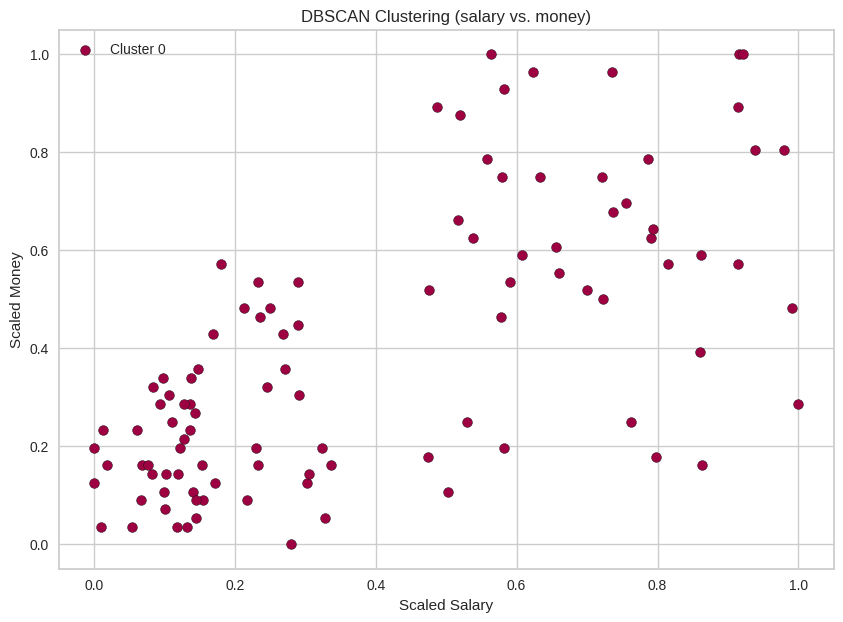

In [91]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# JSON 파일 경로
file_path = '/content/drive/MyDrive/ssafy/new_user_data.json'

# JSON 파일 불러오기
with open(file_path, 'r') as file:
    data = json.load(file)

# fields 키의 값들을 추출하여 DataFrame 생성
df = pd.DataFrame([item['fields'] for item in data])

# 숫자가 지수 표기법으로 표시되지 않도록 설정
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 클러스터링에 사용할 데이터 준비
X = df[['salary', 'age']].values

# Min-Max Scaling 적용
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster_labels = dbscan.fit_predict(X_scaled)

# 클러스터링 결과를 데이터프레임에 추가
df['cluster'] = cluster_labels

# 각 클러스터 별 평균 salary, money, age 계산
cluster_means = df.groupby('cluster').agg({
    'salary': 'mean',
    'money': 'mean',
    'age': 'mean'
}).reset_index()

# 각 클러스터 별로 financial_products를 선택한 횟수 계산
cluster_summary = df.groupby('cluster')['financial_products'].apply(lambda x: ','.join(x)).reset_index()
cluster_summary['financial_products'] = cluster_summary['financial_products'].apply(lambda x: pd.Series(x.split(',')).value_counts().to_dict())

# 클러스터 평균과 financial_products 요약 병합
summary = pd.merge(cluster_means, cluster_summary, on='cluster')

# 결과 출력
print("\nDBSCAN Clustering Results:")
display(summary)

# 클러스터링 결과 시각화 (salary vs. money)
plt.figure(figsize=(10, 7))
unique_labels = np.unique(cluster_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # 노이즈는 검은색으로 표시

    class_member_mask = (cluster_labels == k)
    xy = X_scaled[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise', edgecolors='k', s=50)

plt.title('DBSCAN Clustering (salary vs. money)')
plt.xlabel('Scaled Salary')
plt.ylabel('Scaled Money')
plt.legend()
plt.show()
